In [1]:
import pandas as pd

In [2]:
out_train = pd.read_csv('Data/Train/1.옥외누수(out-training).csv')
in_train = pd.read_csv('Data/Train/2.옥내누수(in-training).csv')
noise_train = pd.read_csv('Data/Train/3.기계.전기음(noise-training).csv')
other_train = pd.read_csv('Data/Train/4.환경음(other-training).csv')
normal_train = pd.read_csv('Data/Train/5.정상음(normal-training).csv')

In [3]:
out_train.head()

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
2,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
3,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515


In [4]:
out_train.shape

(17539, 539)

In [5]:
out_train.dtypes

site      object
sid       object
ldate      int64
lrate      int64
llevel     int64
           ...  
MAX15      int64
MAX16      int64
MAX17      int64
MAX18      int64
MAX19      int64
Length: 539, dtype: object

In [6]:
out_train.describe()

,ldate,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
count,1.753900e+04,17539.0,17539.000000,17539.0,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,...,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000,17539.000000
mean,2.019979e+07,90.0,526.792063,0.0,5.733109,6.025372,6.388563,6.859969,7.373796,8.555505,...,564.972917,528.364331,558.925822,529.586864,559.081476,529.224528,559.534751,528.803638,564.791607,526.192200
std,6.791684e+03,0.0,223.604454,0.0,6.682885,6.933443,7.259580,7.849567,8.681663,16.416778,...,900.808910,245.779571,888.567655,245.986950,888.778054,244.276700,890.143894,245.468851,899.266655,245.111561
min,2.019023e+07,90.0,134.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,13.000000,60.000000,13.000000,40.000000,11.000000,50.000000,18.000000,50.000000,13.000000
25%,2.019083e+07,90.0,342.000000,0.0,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,270.000000,328.000000,270.000000,328.500000,270.000000,328.000000,270.000000,328.000000,270.000000,326.000000
50%,2.020052e+07,90.0,511.000000,0.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,340.000000,502.000000,340.000000,502.000000,340.000000,505.000000,340.000000,504.000000,340.000000,500.000000
75%,2.020121e+07,90.0,691.000000,0.0,7.000000,7.000000,7.000000,8.000000,9.000000,9.000000,...,390.000000,699.500000,390.000000,701.000000,390.000000,702.000000,390.000000,701.000000,390.000000,697.500000
max,2.021021e+07,90.0,1235.000000,0.0,83.000000,89.000000,114.000000,191.000000,322.000000,338.000000,...,4920.000000,1594.000000,4900.000000,1273.000000,4900.000000,1275.000000,4910.000000,1274.000000,4890.000000,1272.000000


예측에 필요 없는 site, sid, ldate 와, 실제 누수량 데이터인 lrate, llevel 을 drop 합니다.

In [7]:
out_train.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
in_train.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
noise_train.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
other_train.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
normal_train.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)

In [8]:
out_train.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,18,19,16,20,19,17,16,20,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,out,0,4,2,4,6,4,6,8,8,...,310,423,300,711,270,412,270,531,290,538
2,out,0,0,0,3,3,3,3,5,14,...,240,751,240,897,240,741,240,741,240,562
3,out,0,2,2,2,2,2,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,out,0,3,3,3,3,3,3,3,5,...,400,521,400,395,400,461,400,470,400,515


In [9]:
train = pd.concat([out_train, in_train, noise_train, other_train, normal_train]).reset_index(drop=True)

In [10]:
train.describe()

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
count,62564.0,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,...,62564.00000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000,62564.000000
mean,0.0,5.305719,5.583562,5.943482,6.340084,6.768062,11.076642,7.098475,7.580366,8.516687,...,511.05492,413.370804,505.911547,413.052426,506.957356,412.666709,513.520235,413.740873,511.642958,411.035420
std,0.0,5.699169,6.325584,7.180028,8.261700,9.520785,53.026483,8.660874,9.009851,11.148871,...,821.25583,285.865414,808.999371,286.484312,810.835384,286.436706,824.983970,287.399663,819.483059,287.275671
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.00000,9.000000,30.000000,9.000000,30.000000,9.000000,30.000000,9.000000,30.000000,9.000000
25%,0.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,260.00000,168.000000,260.000000,167.000000,260.000000,167.000000,260.000000,166.000000,260.000000,166.000000
50%,0.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,310.00000,366.000000,310.000000,366.000000,310.000000,366.000000,310.000000,368.000000,310.000000,363.000000
75%,0.0,5.000000,5.000000,6.000000,6.000000,6.000000,7.000000,7.000000,8.000000,9.000000,...,380.00000,612.000000,380.000000,612.000000,380.000000,614.000000,390.000000,616.000000,390.000000,612.000000
max,0.0,83.000000,146.000000,125.000000,196.000000,322.000000,1221.000000,172.000000,186.000000,438.000000,...,4990.00000,1656.000000,5000.000000,1723.000000,5000.000000,1698.000000,5000.000000,1717.000000,5000.000000,1710.000000


In [11]:
train.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,18,19,16,20,19,17,16,20,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,out,0,4,2,4,6,4,6,8,8,...,310,423,300,711,270,412,270,531,290,538
2,out,0,0,0,3,3,3,3,5,14,...,240,751,240,897,240,741,240,741,240,562
3,out,0,2,2,2,2,2,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,out,0,3,3,3,3,3,3,3,5,...,400,521,400,395,400,461,400,470,400,515


In [12]:
train['leaktype'].value_counts()

leaktype
normal    19704
out       17539
in        13273
other      7019
noise      5029
Name: count, dtype: int64

In [13]:
train['leaktype'].value_counts(normalize=True) * 100

leaktype
normal    31.494150
out       28.033693
in        21.215076
other     11.218912
noise      8.038169
Name: proportion, dtype: float64

AIHub 의 데이터 설명에 따르면, 옥외누수 (out) 와 옥내누수 (in) 이 이상상태이며, 나머지가 정상 상태입니다. AIHub 에 나와있는 데이터 빈도와 실제 데이터 빈도가 조금 다른거 같아서, 블로그 작성하실때 참고해주시면 될것같습니다. (31.49 ~ 8.03 이 데이터 비율입니다)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
X = train.drop('leaktype', axis=1)
y = train['leaktype']

# 2. 데이터 분할 (훈련 데이터와 테스트 데이터로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 4. 모델 평가
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9114520898265803


우선 Baseline 으로 간단한 랜덤 포레스트 모델을 학습해 봤습니다. 5개 라벨 예측에서 전체 정확도는 91.1% 가 나왔습니다.

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          in       0.91      0.87      0.89      2622
       noise       0.84      0.77      0.81       988
      normal       0.95      1.00      0.97      3933
       other       0.94      0.79      0.86      1481
         out       0.88      0.94      0.91      3489

    accuracy                           0.91     12513
   macro avg       0.90      0.87      0.89     12513
weighted avg       0.91      0.91      0.91     12513



각 클래스별 정확도, recall, f1-score 값입니다.

In [17]:
X_train.shape

(50051, 533)

컬럼의 수가 533개로 너무 많습니다. 우선 어떤 피쳐가 중요한지 확인해 보겠습니다.

In [19]:
import matplotlib.pyplot as plt

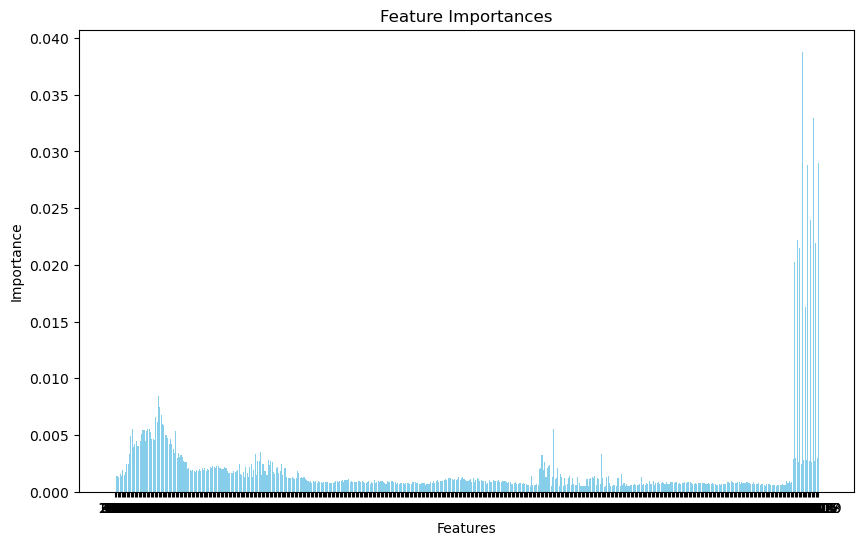

In [20]:
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, rf_classifier.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(features)
plt.show()

In [21]:
pd.set_option('display.max_seq_items', None)
X.columns

Index(['0HZ', '10HZ', '20HZ', '30HZ', '40HZ', '50HZ', '60HZ', '70HZ', '80HZ',
       '90HZ', '100HZ', '110HZ', '120HZ', '130HZ', '140HZ', '150HZ', '160HZ',
       '170HZ', '180HZ', '190HZ', '200HZ', '210HZ', '220HZ', '230HZ', '240HZ',
       '250HZ', '260HZ', '270HZ', '280HZ', '290HZ', '300HZ', '310HZ', '320HZ',
       '330HZ', '340HZ', '350HZ', '360HZ', '370HZ', '380HZ', '390HZ', '400HZ',
       '410HZ', '420HZ', '430HZ', '440HZ', '450HZ', '460HZ', '470HZ', '480HZ',
       '490HZ', '500HZ', '510HZ', '520HZ', '530HZ', '540HZ', '550HZ', '560HZ',
       '570HZ', '580HZ', '590HZ', '600HZ', '610HZ', '620HZ', '630HZ', '640HZ',
       '650HZ', '660HZ', '670HZ', '680HZ', '690HZ', '700HZ', '710HZ', '720HZ',
       '730HZ', '740HZ', '750HZ', '760HZ', '770HZ', '780HZ', '790HZ', '800HZ',
       '810HZ', '820HZ', '830HZ', '840HZ', '850HZ', '860HZ', '870HZ', '880HZ',
       '890HZ', '900HZ', '910HZ', '920HZ', '930HZ', '940HZ', '950HZ', '960HZ',
       '970HZ', '980HZ', '990HZ', '1000HZ', '1010HZ', 

저음 영역대와, MAX 값이 중요하다는 사실을 알 수 있습니다. 저음 영역대인 초반 80개(0HZ ~ 790HZ)와 후반 20개 데이터를 사용하겠습니다.

In [22]:
X_train_2 = pd.concat([X_train.iloc[:, :80], X_train.iloc[:, -20:]], axis=1)
X_test_2 = pd.concat([X_test.iloc[:, :80], X_test.iloc[:, -20:]], axis=1)

rf_classifier_2 = RandomForestClassifier(random_state=42)
rf_classifier_2.fit(X_train_2, y_train)

y_pred = rf_classifier_2.predict(X_test_2)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9303923919124111


기존의 정확도인 Accuracy: 0.9114520898265803 보다 성능이 높아졌습니다. 각 라벨의 정확도도 확인해 보겠습니다.

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          in       0.92      0.91      0.91      2622
       noise       0.87      0.82      0.85       988
      normal       0.97      1.00      0.98      3933
       other       0.94      0.81      0.87      1481
         out       0.91      0.95      0.93      3489

    accuracy                           0.93     12513
   macro avg       0.92      0.90      0.91     12513
weighted avg       0.93      0.93      0.93     12513



In [24]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


예측 성능을 더 높이기 위해 XGBoost 를 사용해 학습해 보겠습니다. XGBoost 는 y라벨로 string 형식을 지원하지 않으므로 정수 형태로 인코딩 해야 합니다.

In [25]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test.values.ravel())

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train_2, y_train_encoded)

y_pred = xgb_classifier.predict(X_test_2)
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8955486294253976


정확도가 기존 (Accuracy: 0.9303923919124111) 보다 낮아졌습니다. XGBoost 는 많은 하이퍼 파라미터를 가지고 있고, 이에 민감한 알고리즘이기 때문입니다. 따라서 적절한 하이퍼파라미터 튜닝을 해야 합니다. XGBoost 는 연산 비용이 높은 알고리즘이기 때문에, Grid-Search 나 Random-Search 보다 효율적인 베이지안 최적화를 사용해 보겠습니다.

In [28]:
!pip install bayesian-optimization

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def xgb_eval(eta, min_child_weight, gamma, max_depth, colsample_bytree, lambda_, alpha):
    params = {
        'eta': eta,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'max_depth': int(max_depth),
        'colsample_bytree': colsample_bytree,
        'lambda': lambda_,
        'alpha': alpha,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'tree_method': 'hist',
        'device': 'cuda',
        'random_state': 42
    }
    xgb_model = XGBClassifier(**params)
    scores = cross_val_score(xgb_model, X_train_2, y_train_encoded, cv=3, scoring='accuracy')
    return scores.mean()

pbounds = {
    'eta': (0.001, 1.),
    'min_child_weight': (0, 10),
    'gamma': (0, 5),
    'max_depth': (3, 50),
    'colsample_bytree': (0.3, 1.0),
    'lambda_': (0, 3),
    'alpha': (0, 3),
}

optimizer = BayesianOptimization(f=xgb_eval, pbounds=pbounds, random_state=42)

optimizer.maximize(init_points=5, n_iter=200)

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   |  lambda_  | max_depth | min_ch... |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.8417    | 1.124     | 0.9655    | 0.7323    | 2.993     | 0.4681    | 10.33     | 0.5808    |
| 2         | 0.9071    | 2.599     | 0.7208    | 0.7084    | 0.1029    | 2.91      | 42.12     | 2.123     |
| 3         | 0.8748    | 0.5455    | 0.4284    | 0.3049    | 2.624     | 1.296     | 16.69     | 6.119     |
| 4         | 0.865     | 0.4185    | 0.5045    | 0.367     | 2.28      | 2.356     | 12.38     | 5.142     |
| 5         | 0.884     | 1.777     | 0.3325    | 0.6079    | 0.8526    | 0.1952    | 47.6      | 9.656     |
| 6         | 0.8615    | 0.7807    | 0.3       | 0.001     | 0.0       | 3.0       | 34.41     | 4.537     |
| 7         | 0.8854    | 3.0       | 0.8605    | 0.9886    | 0.3049    | 2.54      | 46.28     | 2.036     |
| 8       

| 45        | 0.8093    | 0.0       | 1.0       | 0.001     | 0.0       | 3.0       | 29.37     | 8.147     |
| 46        | 0.9196    | 0.7858    | 0.8284    | 0.8523    | 0.0       | 2.38      | 28.47     | 7.862     |
| 47        | 0.9186    | 0.8251    | 0.6743    | 0.5357    | 0.06203   | 2.186     | 29.3      | 9.015     |
| 48        | 0.9261    | 0.1812    | 0.7847    | 0.568     | 0.0       | 2.374     | 30.16     | 9.448     |
| 49        | 0.9209    | 0.5076    | 0.8611    | 0.3033    | 0.2421    | 1.937     | 29.12     | 8.208     |
| 50        | 0.9323    | 0.5894    | 1.0       | 0.2033    | 0.0       | 2.73      | 27.91     | 7.302     |
| 51        | 0.9057    | 0.3245    | 0.4284    | 0.4008    | 0.7219    | 2.311     | 27.98     | 8.231     |
| 52        | 0.9237    | 0.0       | 1.0       | 0.6642    | 0.0       | 1.84      | 28.3      | 8.664     |
| 53        | 0.9139    | 1.262     | 0.8264    | 0.7078    | 0.04817   | 1.036     | 30.33     | 7.797     |
| 54      

| 90        | 0.9268    | 0.6301    | 0.3315    | 0.1221    | 0.1051    | 0.9326    | 28.7      | 8.137     |
| 91        | 0.8999    | 0.2968    | 0.324     | 0.8555    | 0.1015    | 0.246     | 28.95     | 8.323     |
| 92        | 0.9095    | 0.601     | 0.6852    | 0.6934    | 0.137     | 1.421     | 26.55     | 9.023     |
| 93        | 0.9254    | 0.3285    | 0.9382    | 0.3147    | 0.1188    | 1.83      | 26.0      | 9.606     |
| 94        | 0.9069    | 0.1887    | 0.6549    | 0.03846   | 0.4791    | 2.377     | 26.68     | 9.844     |
| 95        | 0.9174    | 0.7016    | 0.7678    | 0.623     | 0.08307   | 0.4825    | 28.63     | 7.551     |
| 96        | 0.922     | 0.0       | 0.9199    | 0.7242    | 0.0       | 2.12      | 26.19     | 8.924     |
| 97        | 0.886     | 0.09483   | 0.9089    | 0.8059    | 0.8643    | 0.8082    | 26.04     | 9.232     |
| 98        | 0.9186    | 1.57      | 0.3795    | 0.06935   | 0.3882    | 0.2801    | 28.66     | 7.712     |
| 99      

| 136       | 0.9233    | 0.1875    | 0.9259    | 0.07121   | 0.0       | 1.635     | 25.96     | 8.807     |
| 137       | 0.9138    | 0.03557   | 0.643     | 0.3343    | 0.5866    | 0.9996    | 28.88     | 7.596     |
| 138       | 0.8715    | 1.638     | 0.8569    | 0.1262    | 4.317     | 0.8622    | 47.84     | 5.123     |
| 139       | 0.9114    | 1.883     | 0.8125    | 0.2538    | 0.6133    | 2.773     | 23.68     | 4.47      |
| 140       | 0.8375    | 1.173     | 0.9402    | 0.6693    | 3.774     | 0.351     | 13.76     | 4.42      |
| 141       | 0.9177    | 0.4852    | 0.3834    | 0.06695   | 0.7435    | 2.115     | 27.69     | 8.329     |
| 142       | 0.8813    | 2.286     | 0.4873    | 0.9321    | 0.4146    | 1.326     | 29.97     | 8.575     |
| 143       | 0.9044    | 1.761     | 0.9492    | 0.2429    | 0.9942    | 1.5       | 31.07     | 5.1       |
| 144       | 0.843     | 1.796     | 0.5892    | 0.4722    | 3.829     | 1.162     | 14.32     | 6.54      |
| 145     

| 182       | 0.9271    | 0.4048    | 0.3876    | 0.1864    | 0.1929    | 2.181     | 28.92     | 8.813     |
| 183       | 0.9041    | 0.7725    | 0.5327    | 0.842     | 0.1713    | 1.933     | 25.52     | 8.828     |
| 184       | 0.9139    | 0.6725    | 0.8611    | 0.04613   | 0.08455   | 1.919     | 32.71     | 8.674     |
| 185       | 0.9205    | 2.977     | 0.7004    | 0.3863    | 0.04313   | 0.8524    | 30.34     | 7.915     |
| 186       | 0.8958    | 2.484     | 0.3       | 0.477     | 0.5598    | 0.0       | 28.39     | 7.755     |
| 187       | 0.9055    | 1.06      | 0.9909    | 0.8387    | 0.1443    | 1.329     | 32.16     | 8.733     |
| 188       | 0.9035    | 0.604     | 0.9175    | 0.4513    | 0.8467    | 1.797     | 32.61     | 7.958     |
| 189       | 0.909     | 0.5211    | 1.0       | 0.9502    | 0.05185   | 1.522     | 25.39     | 10.0      |
| 190       | 0.9081    | 1.95      | 0.8282    | 0.7794    | 0.1044    | 2.861     | 28.19     | 7.66      |
| 191     

In [45]:
optimizer.max

{'target': 0.93230908104687,
 'params': {'alpha': 0.5893547220720841,
  'colsample_bytree': 1.0,
  'eta': 0.20334070944650803,
  'gamma': 0.0,
  'lambda_': 2.7303408686032196,
  'max_depth': 27.90916614548846,
  'min_child_weight': 7.301529163320516}}

In [52]:
params = {
    'alpha': 0.5893547220720841,
    'colsample_bytree': 1.0,
    'eta': 0.20334070944650803,
    'gamma': 0.0,
    'lambda': 2.7303408686032196,
    'max_depth': 27,
    'min_child_weight': 7.301529163320516,
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'tree_method': 'hist',
    'device': 'cuda',
    'random_state': 42
}

xgb_classifier = XGBClassifier(**params)
xgb_classifier.fit(X_train_2, y_train_encoded)

y_pred = xgb_classifier.predict(X_test_2)
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9446175976983937


랜덤 포레스트 기본 모델 : Accuracy: 0.9114520898265803

랜덤 포레스트 피쳐 가공 : Accuracy: 0.9303923919124111

XGBoost 하이퍼파라미터 최적화 전 (피쳐 가공) : Accuracy: 0.8955486294253976

XGBoost 하이퍼파라미터 최적화 후 (피쳐 가공) : Accuracy: 0.9446175976983937

XGBoost 의 성능이 가장 좋다는 것을 확인할 수 있습니다.

AIHub 의 상관누수 데이터에서는 별도의 Test Data 를 제공하고 있습니다. 이 데이터를 이용해 랜덤 포레스트 기본모델, 랜덤 포레스트 피쳐 가공 모델, XGBoost 피쳐 가공 및 하이퍼파라미터 튜닝 모델의 성능을 비교해 보겠습니다.

In [67]:
out_test = pd.read_csv('Data/Test/1.옥외누수(out-test).csv')
in_test = pd.read_csv('Data/Test/2.옥내누수(in-test).csv')
noise_test = pd.read_csv('Data/Test/3.기계.전기음(noise-test).csv')
other_test = pd.read_csv('Data/Test/4.환경음(other-test).csv')
normal_test = pd.read_csv('Data/Test/5.정상음(normal-test).csv')

In [68]:
out_test.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
in_test.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
noise_test.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
other_test.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)
normal_test.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1, inplace=True)

In [69]:
test_final = pd.concat([out_test, in_test, noise_test, other_test, normal_test]).reset_index(drop=True)

In [70]:
x_test_f = test_final.drop('leaktype', axis=1)

y_test_f = test_final['leaktype']
y_test_f_encoded = label_encoder.transform(y_test_f.values.ravel())

In [71]:
y_pred = rf_classifier.predict(x_test_f)
accuracy = accuracy_score(y_test_f, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9043478260869565


랜덤 포레스트 Baseline 모델의 정확도 90.4% 

In [72]:
x_test_f = pd.concat([x_test_f.iloc[:, :80], x_test_f.iloc[:, -20:]], axis=1)
y_pred = rf_classifier_2.predict(x_test_f)
accuracy = accuracy_score(y_test_f, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9273657289002557


피쳐 가공된 랜덤 포레스트 모델의 정확도 92.7%

In [73]:
print(classification_report(y_test_f, y_pred))

              precision    recall  f1-score   support

          in       0.92      0.90      0.91      1659
       noise       0.89      0.80      0.84       629
      normal       0.97      1.00      0.98      2462
       other       0.93      0.79      0.86       878
         out       0.90      0.96      0.93      2192

    accuracy                           0.93      7820
   macro avg       0.92      0.89      0.90      7820
weighted avg       0.93      0.93      0.93      7820



In [74]:
y_pred = xgb_classifier.predict(x_test_f)
accuracy = accuracy_score(y_test_f_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9425831202046036


피쳐 가공 및 하이퍼 파라미터 튜닝된 XGBoost 모델의 정확도 94.3%

In [75]:
print(classification_report(y_test_f_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1659
           1       0.90      0.84      0.87       629
           2       1.00      1.00      1.00      2462
           3       0.93      0.85      0.89       878
           4       0.92      0.96      0.94      2192

    accuracy                           0.94      7820
   macro avg       0.93      0.91      0.92      7820
weighted avg       0.94      0.94      0.94      7820



In [76]:
label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{'in': 0, 'noise': 1, 'normal': 2, 'other': 3, 'out': 4}
